In [2]:
import numpy as np
import pandas as pd

import string
import random
import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from tqdm.notebook import tqdm

In [3]:
!pip install tslearn >> None

# Анализируем car_info

In [4]:
# X_blobs = np.concatenate((X_blobs_msk, X_blobs_spb), axis=0)
# y_blobs = np.concatenate((y_blobs_msk, y_blobs_spb), axis=0)

# cities = np.concatenate((np.array([0]*y_blobs_msk.shape[0]), np.array([1]*y_blobs_spb.shape[0])), axis=0)

# print(X_blobs.shape)
# plt.figure(figsize=(12,9))
# plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap ='plasma')
# plt.legend(y_blobs)
# plt.show()

(4250, 10)


,car_type,fuel_type,car_rating,year_to_start,riders,car_id,model,target_2,year_to_work,target_1
3212,standart,petrol,22.5,2013,23466,u-2034566q,Renault Sandero,engine_overheat,2014,7.584265e+05
4054,economy,petrol,26.3,2015,13691,M-1752971h,Hyundai Solaris,engine_check,2015,3.863226e+06
1910,economy,petrol,18.5,2014,7050,K20105985V,Hyundai Solaris,engine_fuel,2014,7.132663e+05
3290,standart,petrol,25.6,2015,35774,t-9895295r,Nissan Qashqai,engine_overheat,2016,9.279915e+05
2870,economy,petrol,25.3,2015,21285,X83711958h,Kia Rio X,engine_ignition,2021,1.361013e+07


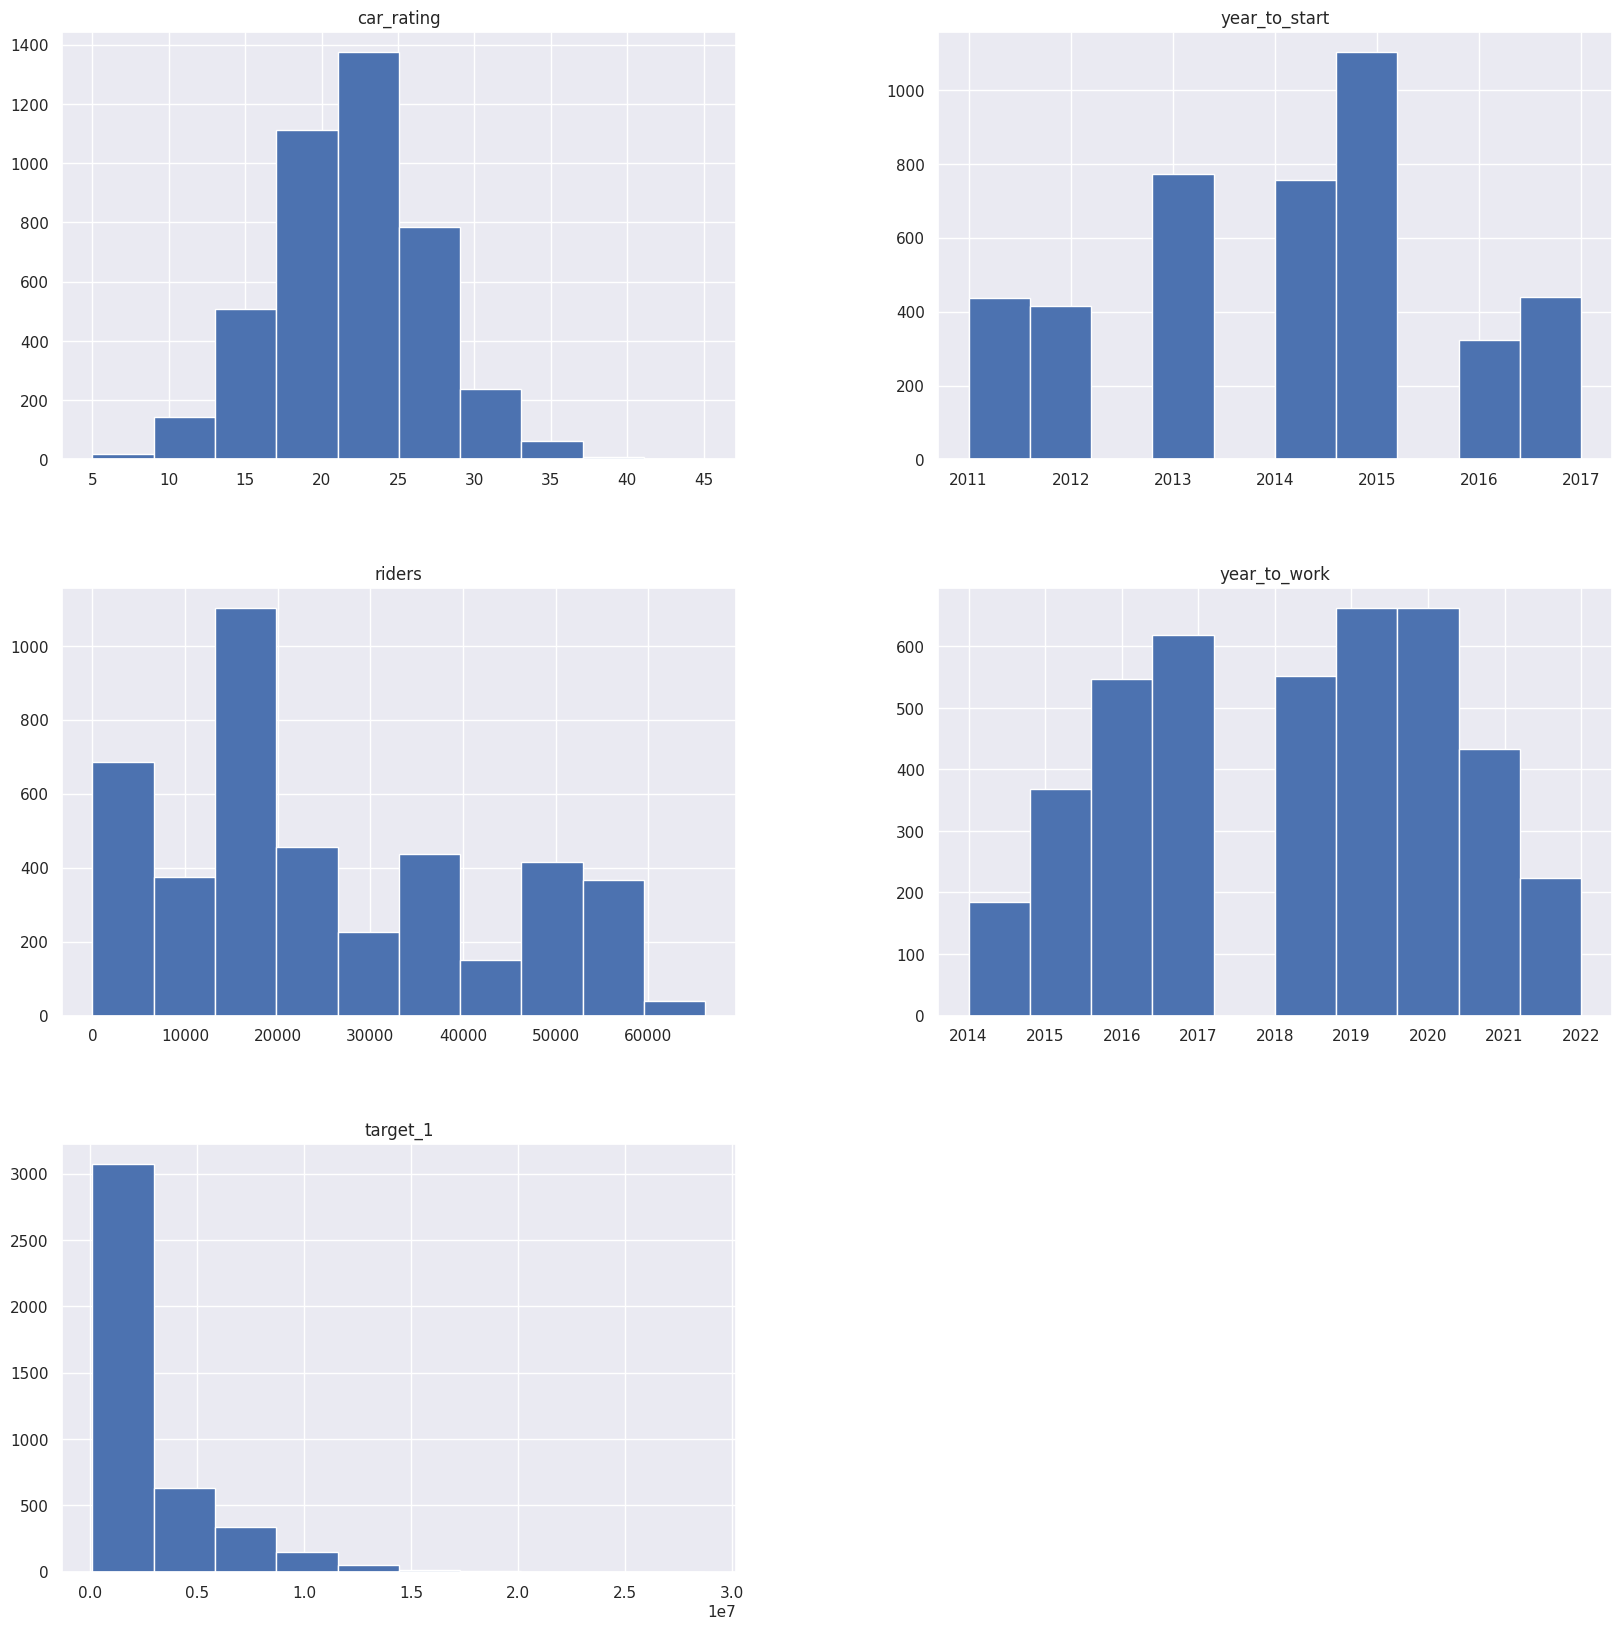

In [5]:
car_info = pd.read_csv('../data/car_info.csv')
print(car_info.shape)
car_info.hist(figsize=(20, 20))
car_info.sample(5)

# Анализируем rider_info

In [6]:
display(rider_info.head(5))
rider_info.hist()

NameError: name 'rider_info' is not defined

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
3147,41,6.4,1590,0,u19494965T,0,2021-7-4
12349,23,7.6,415,9,Z49619717w,1,2019-7-26
6784,30,7.5,250,19,L52004363o,1,2020-4-17
11638,18,7.3,369,8,H51174420Y,1,2019-8-10
7374,29,8.8,998,6,E12922148U,1,2018-12-1


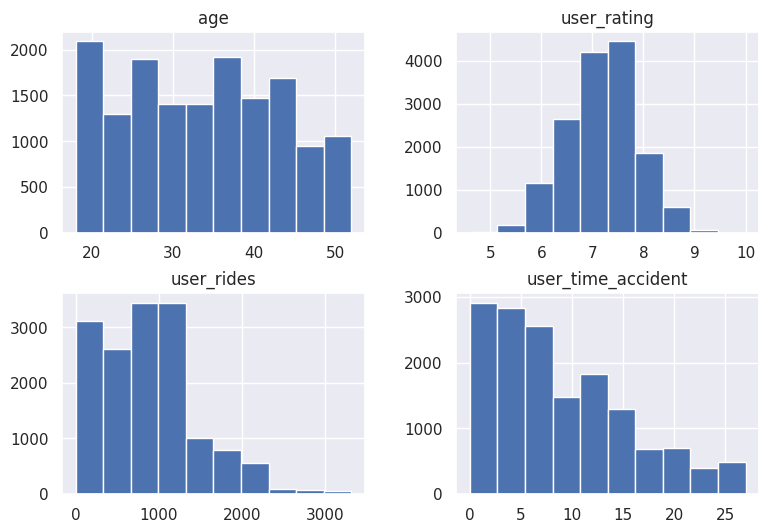

In [7]:
rider_info = pd.read_csv('../data/rider_info.csv')
rider_info.drop('sex', axis=1).hist(figsize=(9, 6))
rider_info.sample(5)

<AxesSubplot: title={'center': 'user_time_accident'}, xlabel='sex'>

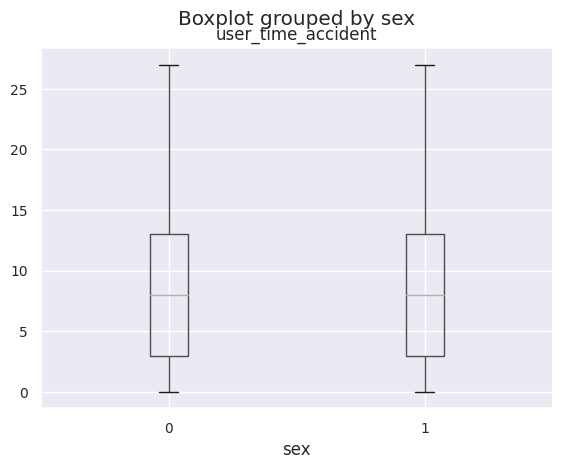

In [8]:
rider_info.boxplot(column=['user_time_accident'], by='sex', fontsize=10)

                     #layout=(1, 2))#('sex', 'user_time_accident')

/tmp/ipykernel_6578/1000601128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rider_info.corr().plot()


<AxesSubplot: >

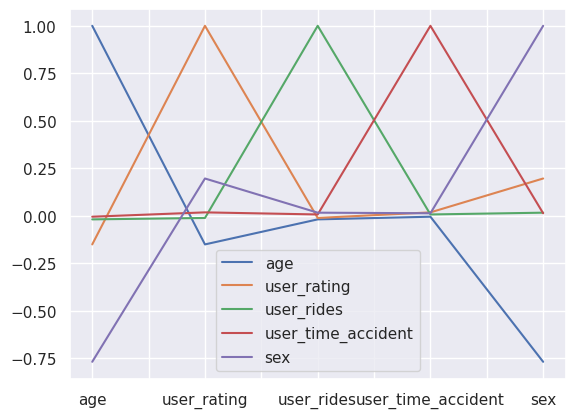

In [9]:
rider_info.corr().plot()

# Анализируем fix_info

(146000, 7)


,work_type,destroy_degree,work_duration,car_id,worker_id,sex,fix_date
38490,reparking,0.0,14,h16405062I,GB,1,2020-3-3 11:26
13473,reparking,0.0,14,q15203256I,FN,0,2021-3-27 11:47
9783,reparking,0.0,15,c20090185F,CT,1,2019-9-9 13:14
30926,reparking,0.0,17,G53310183l,US,1,2020-4-18 14:22
95587,reparking,0.0,10,k28887049x,LK,0,2019-9-17 8:55


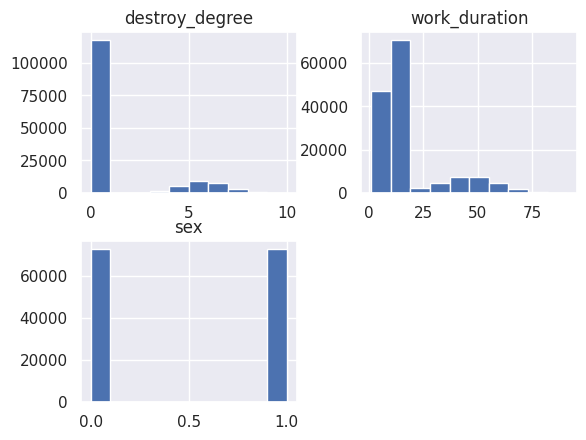

In [10]:
fix_info = pd.read_csv('../data/fix_info.csv')
print(fix_info.shape)
fix_info.hist()
fix_info.sample(5)

# Информация rides_info

In [ ]:
rides_info = pd.read_csv('../data/rides_info.csv')
print(rides_info.shape)
rides_info.hist(figsize=(20, 20))
rides_info.sample(5)

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
632399,G12430401D,s-4497192r,k1V,2020-02-14,4.18,37,326,65,108.769929,6,748.674267,0,7.290174,-58.196
631907,C16478499X,s-4207108I,r1k,2020-02-29,3.63,50,447,32,61.000000,0,1641.921531,0,-5.939452,43.082
79239,K16676378F,F14220851c,I1Y,2020-02-06,7.42,11,138,64,77.960669,0,625.328929,0,10.629209,53.769
96642,r39518909n,G86360617b,v1e,2020-02-08,3.83,88,1138,48,84.903540,2,4298.761883,0,-19.687279,-33.539
453753,e17695703A,f18622639s,a1f,2020-03-12,3.79,19,259,43,96.000000,1,362.539773,0,-10.314589,4.975


In [12]:
rides_info.corr()

/tmp/ipykernel_6578/2333666931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rides_info.corr()


,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,car_rating,user_ride_quality,deviation_normal,killer_fs
rating,1.000000,-0.002205,-0.001344,-0.003869,0.002732,0.000674,0.000842,-0.002185,-0.000118,-0.000666,0.001163,0.000640
ride_duration,-0.002205,1.000000,0.004880,-0.004396,-0.001467,0.004589,-0.003752,0.003170,-0.002053,0.002078,-0.001828,-0.006161
ride_cost,-0.001344,0.004880,1.000000,-0.004410,-0.001530,0.006324,-0.002836,0.000429,0.002934,-0.001478,-0.000898,0.004583
speed_avg,-0.003869,-0.004396,-0.004410,1.000000,0.214994,-0.447166,0.016781,0.003284,0.294983,0.001672,0.002292,0.002013
speed_max,0.002732,-0.001467,-0.001530,0.214994,1.000000,-0.095454,0.005933,0.012259,0.099215,-0.000975,0.001109,0.000793
stop_times,0.000674,0.004589,0.006324,-0.447166,-0.095454,1.000000,-0.000761,-0.004214,-0.002770,0.003597,0.004472,0.002238
distance,0.000842,-0.003752,-0.002836,0.016781,0.005933,-0.000761,1.000000,0.001043,0.001258,-0.004121,-0.001532,0.002628
refueling,-0.002185,0.003170,0.000429,0.003284,0.012259,-0.004214,0.001043,1.000000,0.004081,-0.002005,0.000556,0.000148
car_rating,-0.000118,-0.002053,0.002934,0.294983,0.099215,-0.002770,0.001258,0.004081,1.000000,-0.030911,0.015824,0.023920
user_ride_quality,-0.000666,0.002078,-0.001478,0.001672,-0.000975,0.003597,-0.004121,-0.002005,-0.030911,1.000000,0.063815,0.016021


/tmp/ipykernel_6578/2497499378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rides_info.corr().round(2), square = True, annot=True)


<AxesSubplot: >

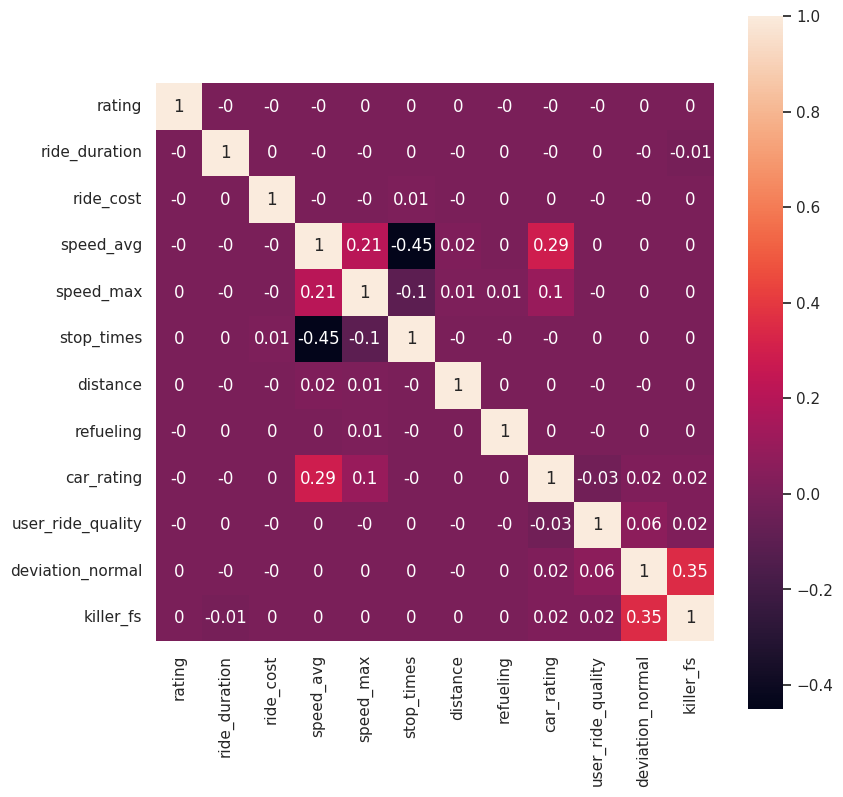

In [13]:
plt.rcParams['figure.figsize']=(9,9)
sns.heatmap(rides_info.corr().round(2), square = True, annot=True)

/tmp/ipykernel_6578/3166554203.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(rides_info.corr().round(2),


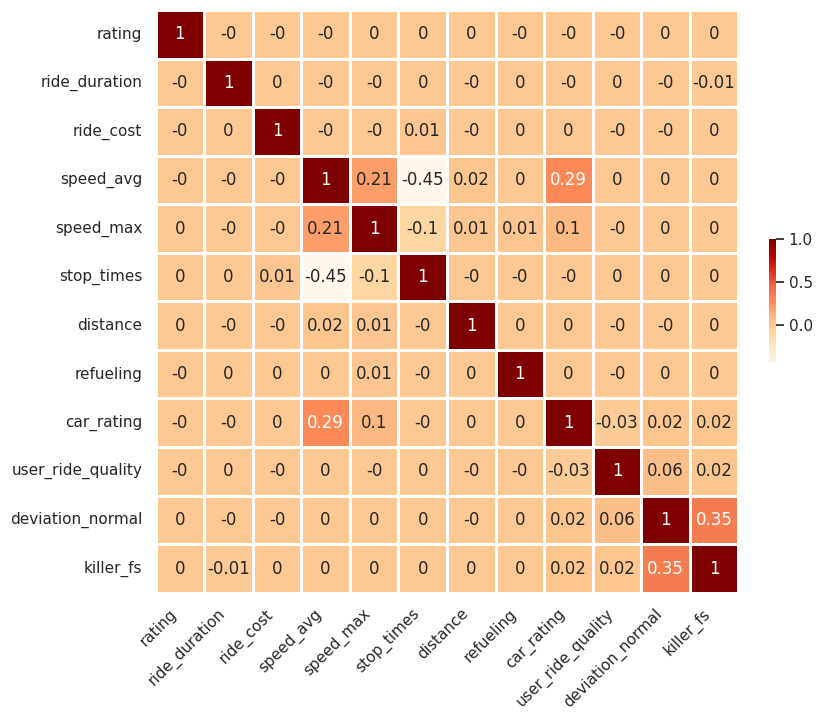

In [50]:
colormap = sns.color_palette("Blues")
#sns.heatmap(train.corr(), annot=True, cmap=colormap);
plt.rcParams['figure.figsize']=(8, 10)

g = sns.heatmap(rides_info.corr().round(2),
            annot=True,
            square = True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1, # space between cells
            ); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

# sns.displot()

In [5]:
rides_info = pd.read_csv('../data/rides_info.csv').drop(['car_rating'], axis=1)
car_info = pd.read_csv('../data/car_info.csv')[['car_id','target_1', 'target_2']]
rides_info = rides_info.merge(car_info, on = 'car_id', how = 'left')
rides_info.head()                                          

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,target_1,target_2
0,O99128811L,A-1033131b,a1m,2020-01-01,4.32,33.606468,297,37.000000,41.000000,1,0.286812,0,0.364733,0.252,1.712333e+07,engine_ignition
1,H70665909D,A-1033131b,b1n,2020-01-01,5.65,92.160352,1193,21.000000,37.000000,2,0.900576,0,0.240391,0.127,1.712333e+07,engine_ignition
2,b21653869m,A-1033131b,D1A,2020-01-02,4.59,29.491600,260,38.642341,42.642341,1,0.424380,0,1.352441,0.441,1.712333e+07,engine_ignition
3,A20633361j,A-1033131b,O1K,2020-01-02,4.37,59.954135,654,25.167607,57.000000,0,0.337006,0,1.174927,-0.355,1.712333e+07,engine_ignition
4,u29506811f,A-1033131b,E1U,2020-01-03,4.63,132.367438,1715,38.230802,47.000000,1,1.062512,0,1.866979,-0.424,1.712333e+07,engine_ignition


<Figure size 2000x500 with 0 Axes>

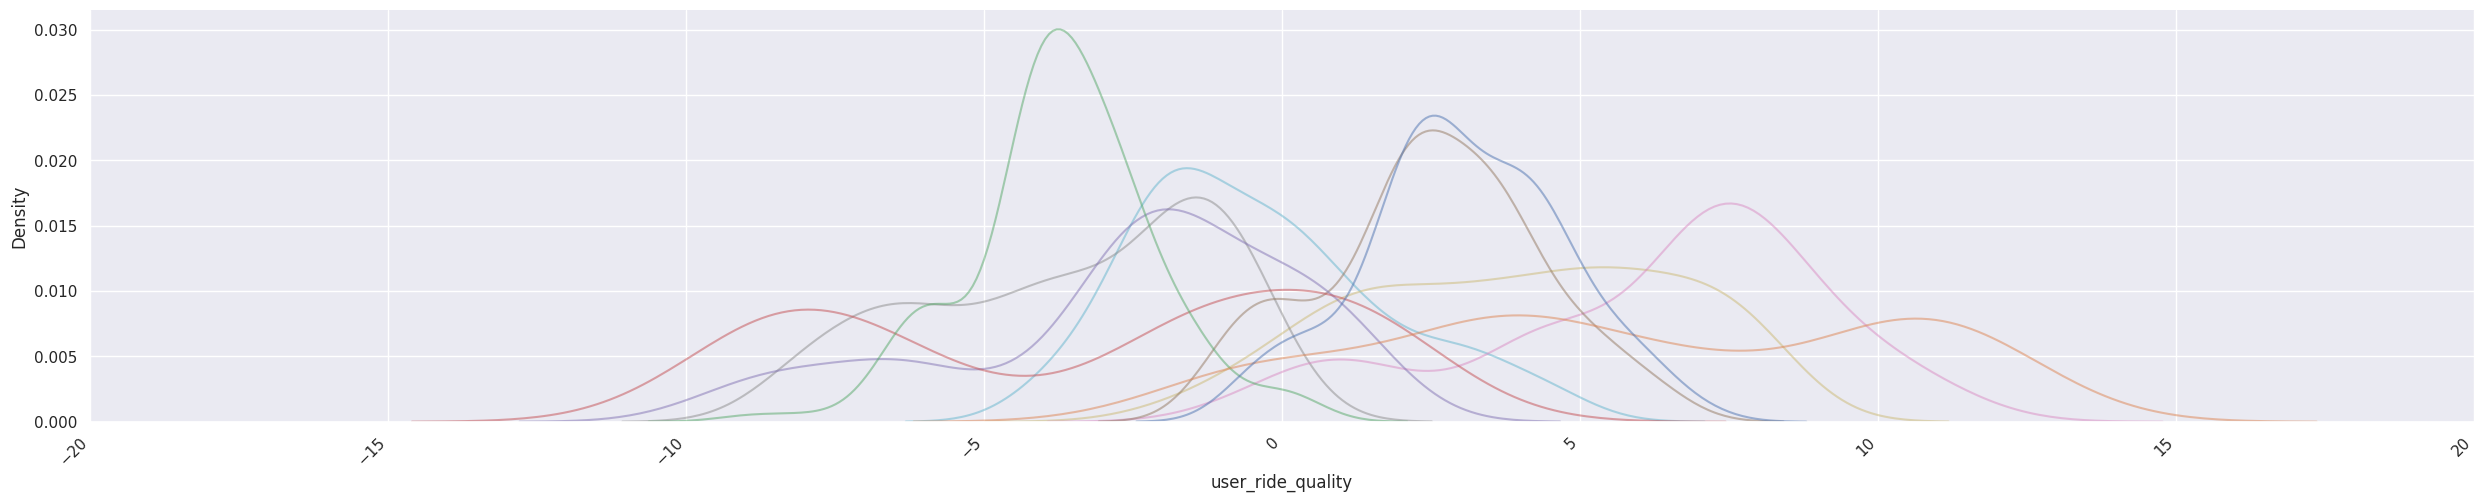

In [6]:
import matplotlib.ticker as ticker


plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:10])]
g = sns.displot(data = tmp, x= 'user_ride_quality', hue='car_id', legend=False, aspect = 5, kind = 'kde', alpha=0.5); 

g.set_xticklabels(rotation=45, horizontalalignment='right');

# g.xaxis.set_major_locator(ticker.MultipleLocator(2))


<Figure size 2000x500 with 0 Axes>

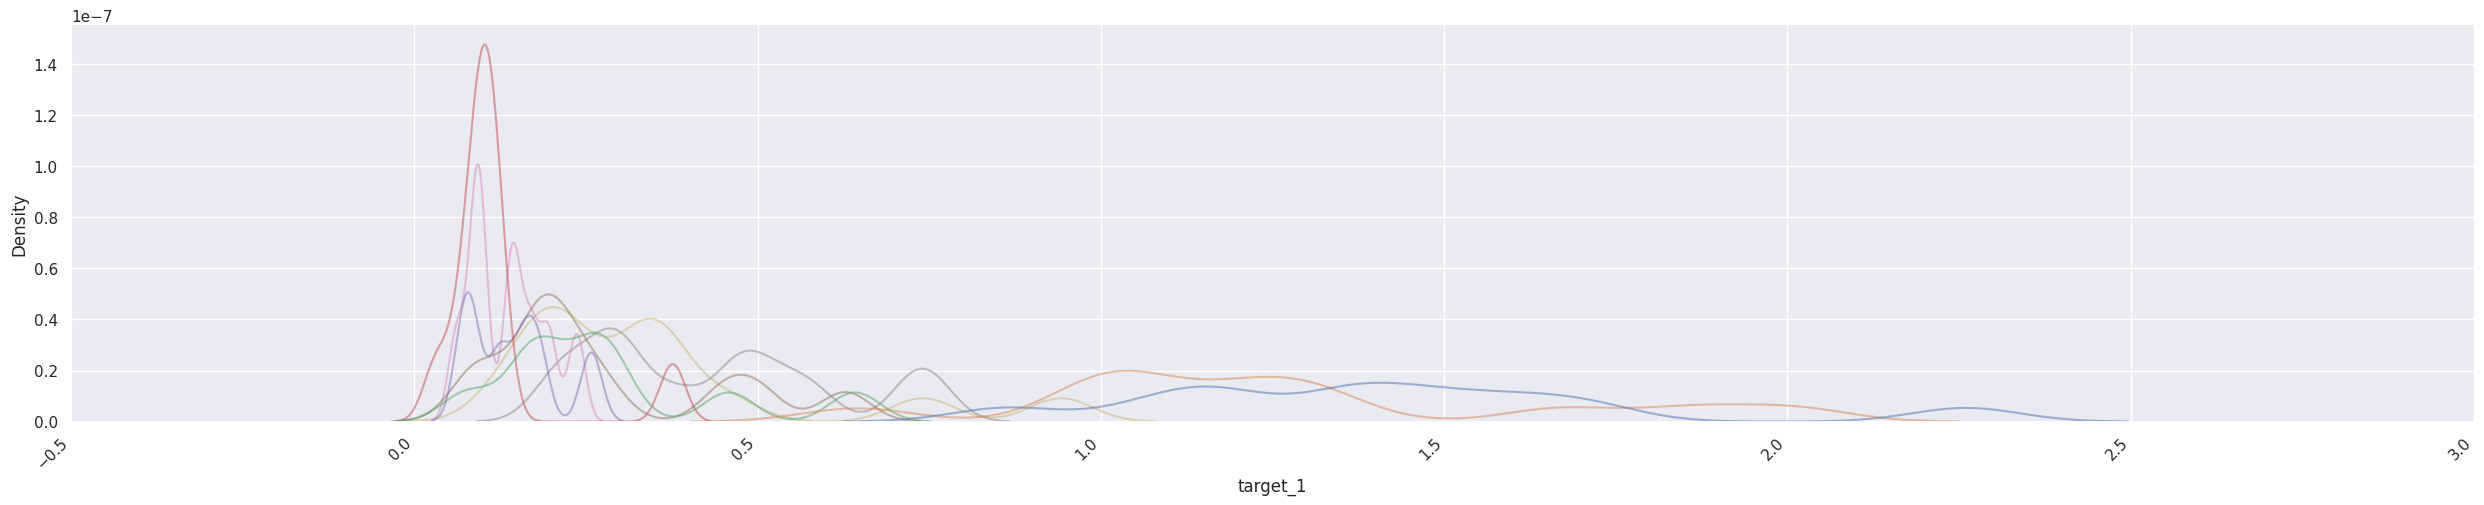

In [25]:
import matplotlib.ticker as ticker


plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:100])]
g = sns.displot(data = tmp, x= 'target_1', hue='target_2', legend=False, aspect = 5, kind = 'kde', alpha=0.5); 

g.set_xticklabels(rotation=45, horizontalalignment='right');

# g.xaxis.set_major_locator(ticker.MultipleLocator(2))


# sns.lineplot()

/tmp/ipykernel_163976/2368371315.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


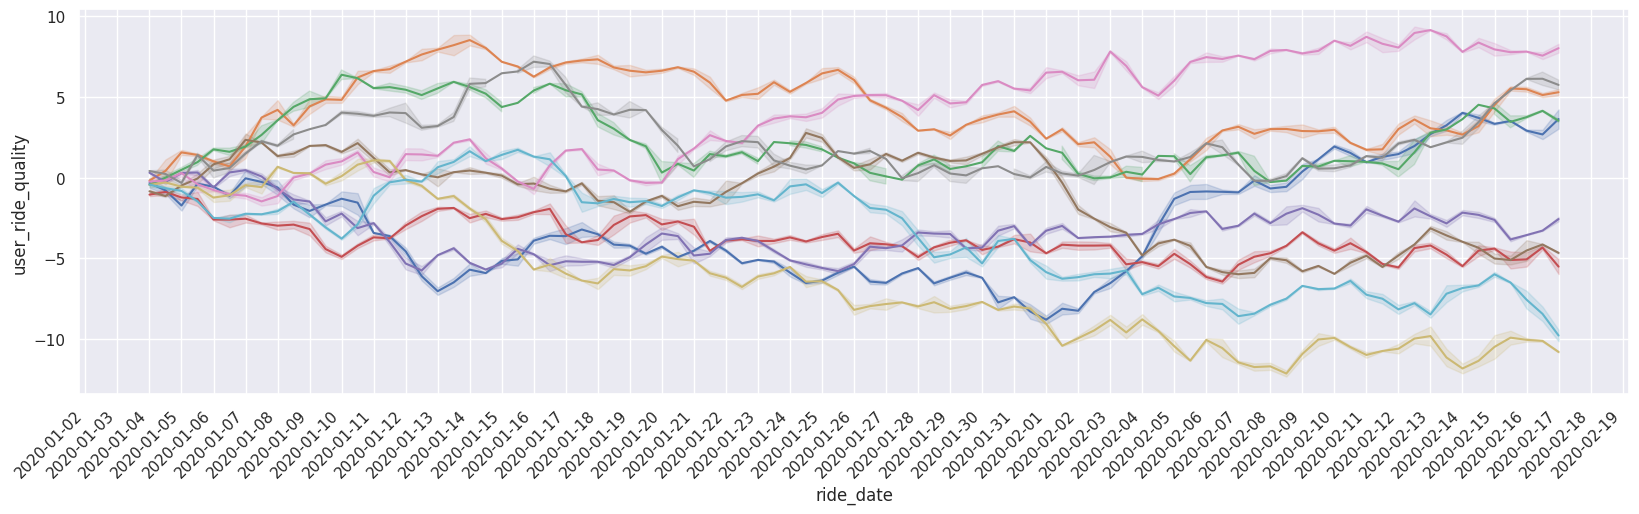

In [21]:
import matplotlib.ticker as ticker


plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(1000).car_id.unique()[:10])]
g = sns.lineplot(data = tmp, x = 'ride_date', y = 'user_ride_quality', hue='car_id', legend=False); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

g.xaxis.set_major_locator(ticker.MultipleLocator(2))


/tmp/ipykernel_163976/107370706.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


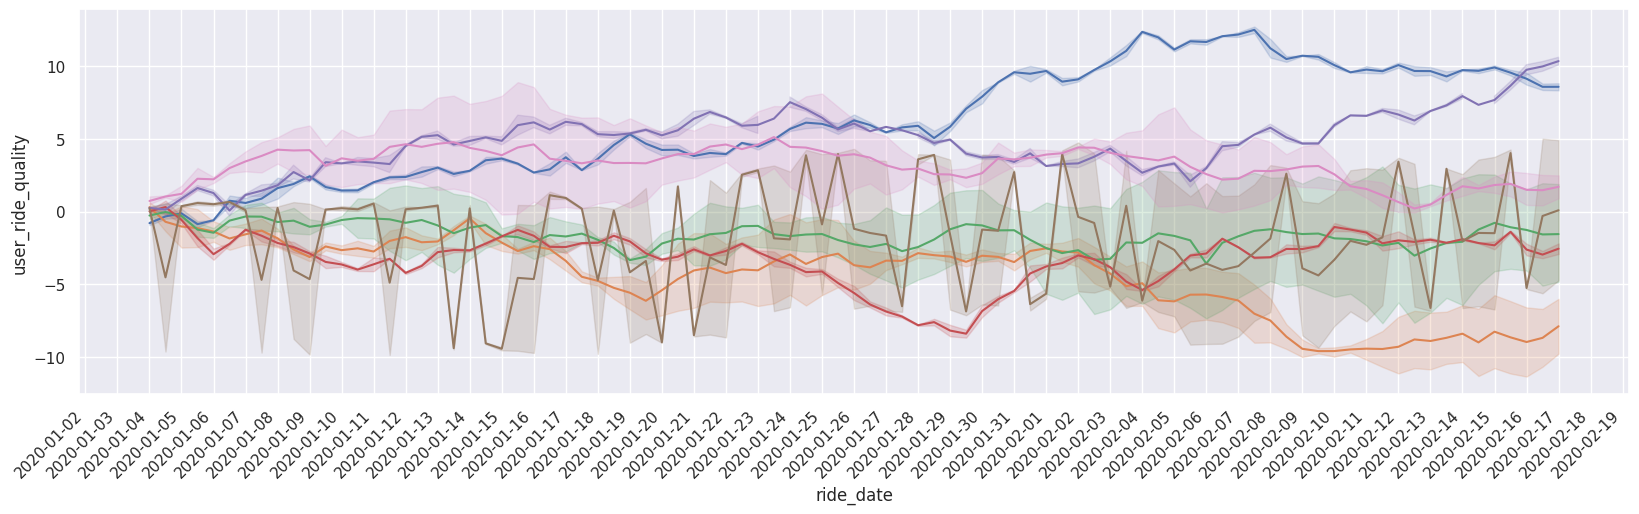

In [26]:
import matplotlib.ticker as ticker


plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(1000).car_id.unique()[:10])]
g = sns.lineplot(data = tmp, x = 'ride_date', y = 'user_ride_quality', hue='target_2', legend=False); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

g.xaxis.set_major_locator(ticker.MultipleLocator(2))


/tmp/ipykernel_163976/2766576236.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');


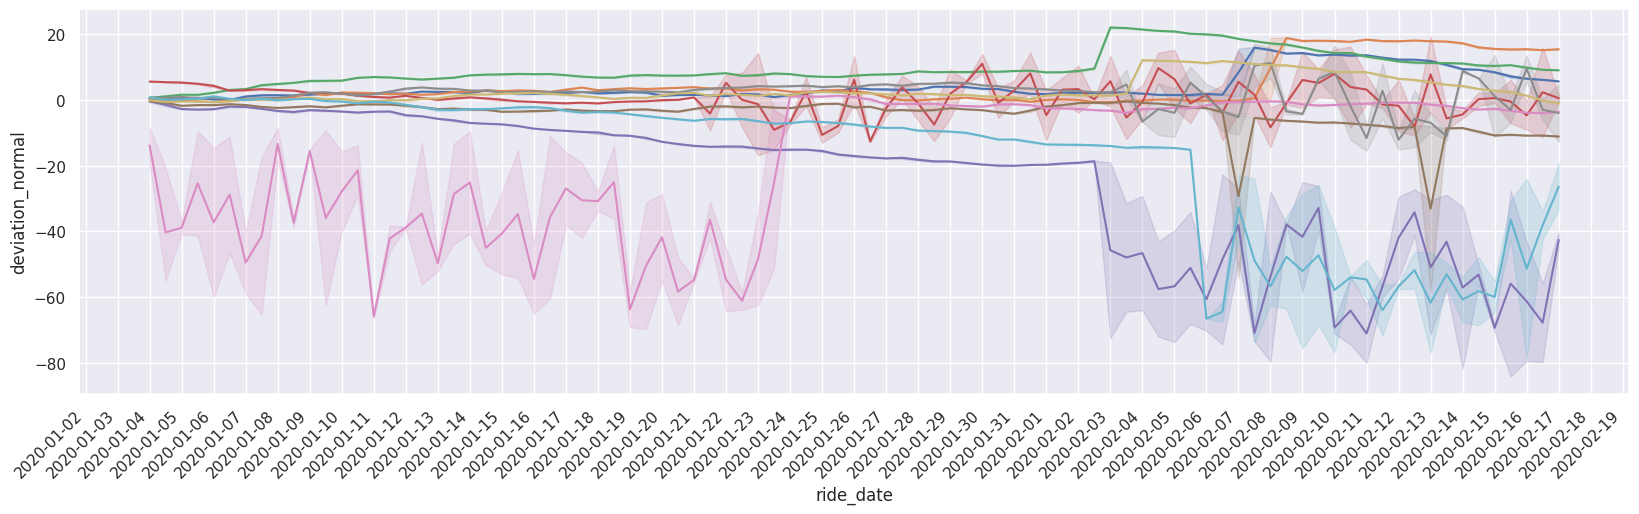

In [14]:
import matplotlib.ticker as ticker


plt.figure(figsize=(20, 5))

tmp = rides_info[rides_info['car_id'].isin(rides_info.sample(100).car_id.unique()[:10])]
g = sns.lineplot(data = tmp, x = 'ride_date', y = 'deviation_normal', hue='car_id', legend=False); 

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

g.xaxis.set_major_locator(ticker.MultipleLocator(2))
#g.xaxis.set_major_formatter(ticker.ScalarFormatter())


In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=rides_info, x='ride_date', y='deviation_normal',
             hue='target_2', legend=False); 
rides_info.head(1)

In [ ]:
sns.displot(data=rides_info, x='deviation_normal', aspect=3)

In [ ]:
sns.displot(data=rides_info, x='deviation_normal', hue='target_2', aspect=3)

In [ ]:
sns.displot(data=rides_info, x='deviation_normal', y='ride_date', aspect=3,
            hue='target_2');

In [ ]:
# cols = ['ride_duration', 'distance', 'speed_max', 'speed_avg', 'target_2', 'stop_times', 'rating', 'car_rating', 'killer_fs']
# sns.pairplot(data = rides_info[cols], hue = 'target_2', corner=True);

# Добавляем сгенерированные фичи и далее от них генерируем таргет

In [ ]:
# Добавляем признаки временные из информации про поездки с помощью TSfresh

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, EfficientFCParameters
from tsfresh.utilities.distribution import MultiprocessingDistributor
from sklearn.feature_selection import VarianceThreshold
from datetime import datetime
import tsfresh

In [ ]:
# # rides_info[["car_id", "ride_date"]+[num_col]]
# tmp = rides_info.merge(res_train_df[['car_id'] + ['deviation_normal__linear_trend__attr_"slope"']], on = 'car_id', how = 'left')
# tmp['slope_sign'] = tmp['deviation_normal__linear_trend__attr_"slope"'] > 0
# # rides_info#['slope'] = 


# plt.figure(figsize=(20, 10))
# sns.lineplot(data = tmp, x = 'ride_date', y = 'deviation_normal', hue = 'slope_sign', legend=False, style = 'car_id'); 
# rides_info.head(1)

In [ ]:
# tmp = rides_info.merge(res_train_df[['car_id'] + ['deviation_normal__linear_trend__attr_"slope"']], on = 'car_id', how = 'left')
# tmp['slope_sign'] = tmp['deviation_normal__linear_trend__attr_"slope"'] > 0
# rides_info#['slope'] = 

# tmp[['real_slope', 'slope_sign']].corr()

rides_info_gr.columns

In [ ]:
print(car_info['car_id'].nunique())
car_info_fs = pd.merge(car_info, rides_info_gr, on = 'car_id', how = 'left')
print(car_info_fs['car_id'].nunique())
car_info_fs = pd.merge(car_info_fs, fix_info_gr, on = 'car_id', how = 'left')
print(car_info_fs['car_id'].nunique())
car_info_fs = pd.merge(car_info_fs, res_train_df, on = 'car_id', how = 'left')
print(car_info_fs['car_id'].nunique())

# Отнормируем фичи, чтоб легче было слепить из них таргет

In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import MinMaxScaler

to_scale_fs = ['car_rating', 'year_to_start', 'riders', 'ride_duration_sum', 'speed_avg_mean',
               'ride_distance_sum', 
               'speed_max_mean', 'speed_max_q', 'speed_max_max', 'crit_low_r', 'worker_count',
               'destroy_degree_max', 'destroy_degree_sum', 'work_duration_mean', 'work_duration_max',
               'work_type_nuniq', 'work_type_crit_perc_q', 'work_type_crit_q', 'worker_experience_mean',
               
               'real_slope', 'deviation_normal__linear_trend__attr_"slope"', 'killer_fs']

not_to_scale_fs = [c for c in car_info_fs.columns if c not in to_scale_fs]

mapper = DataFrameMapper([(to_scale_fs, MinMaxScaler())])
scaled_features = mapper.fit_transform(car_info_fs.copy(), 4)
car_info_fs_ = pd.DataFrame(scaled_features,
                            index = car_info_fs.index,
                            columns = to_scale_fs)

car_info_fs = pd.concat([car_info_fs_, car_info_fs[not_to_scale_fs]], axis=1)
car_info_fs.sample(5)

In [ ]:
car_info_fs['target_2'].value_counts()

In [ ]:
# car_info_fs['real_slope'].value_counts(dropna=False)
# TODO не все машины есть в трейне!

* engine_check
Индикатор «Чек двигателя» -  Этот индикатор на приборке загорается, когда ЭБУ (электронный блок управления двигателем) 
обнаруживает в системе код ошибки в работе какой-либо системы. Например, это происходит, когда ошибку выдает датчик.

* engine_overheat
Перегрев двигателя - Наиболее частой причиной перегрева двигателя является утечка охлаждающей жидкости.
Например, чаще утечка антифриза связана с разгерметизацией радиатора охлаждения, поломкой водяной помпы или с повреждением расширительного бачка. Чтобы уменьшить риск перегрева мотора, нужно заранее менять радиатор и помпу. 

* engine_ignition
Пропуск зажигания — это явление, при котором по какой-то причине воспламенение не произошло, 
Машина ускоряется неровно, набор скорости ей дается тяжело. Неровный холостой ход. Вы можете почувствовать, что машина вибрирует. 
Дело в том, двигатель работает не сбалансированно из-за одного или нескольких неработающих цилиндров

* engine_fuel
Большой расход топлива - Когда двигатель работает эффективно, он сжигает топливо со скоростью, которая помогает эффективно 
расходовать топливо (экономия топлива). Однако некоторые детали топливной системы, такие как топливные фильтры, воздушные фильтры,
датчик массового расхода воздуха и кислородные датчики (лямба-зонд), со временем загрязняются и изнашиваются.

* electro_bug
Разряженный аккумулятор - Срок службы автомобильных аккумуляторов в среднем составляет 3-4 года, или 80 000-100 000 км. 
Батарея обычно стареет со временем, как и любой аккумулятор в вашем смартфоне. Чем чаще батарея проходит циклы разрядки/зарядки, тем быстрее она теряет способность поддерживать нормальный уровень заряда и определенное количество ампер.

* break_bug
Скрип тормозов - тормозная система подвержена износу в течение определенного времени. Тормоза жизненно важны для безопасной остановки.
Поэтому когда вы замечаете какие-либо признаки проблем, такие как визг, скрип или если, например, педаль тормоза стала мягкой, 

* wheel_shake
Дрожание рулевого колеса - Многочисленные проблемы могут вызвать дрожание/дребезжание рулевого колеса во время вождения.
Если это происходит сразу после запуска двигателя и начала вождения, причиной дрожания руля могут быть подшипники колес или поврежденные компоненты подвески. Если это происходит на более высоких скоростях, обычно это говорит о проблеме с балансировкой колес. 

* gear_stick
Неисправность автоматической коробки передач - При правильном обслуживании автоматическая коробка передач может без проблем работать более 300 000 км.
Современная автоматическая трансмиссия представляет собой гидравлическую систему, состоящую из нескольких сальников, прокладок и линий, которые могут быть повреждены, забиты мусором или протекать.
В большинстве случаев используемые сегодня автоматические коробки  передач при правильной эксплуатации и своевременном обслуживании могут потребовать капитальный ремонт при пробеге не ранее 150.000 километров.


engine_check engine_overheat engine_ignition fuel electro_bug break_bug wheel gear_stick

* `target_1` - int
* `target_2` - int

In [ ]:
# car_info_fs.columns.tolist() #.riders.value_counts()

In [ ]:
print(car_info_fs['target_1'].isnull().sum())
car_info_fs['target_1'].hist(bins=30)

In [ ]:
# sns.pairplot(data = car_info_fs, corner=True, hue='target_2');

In [ ]:
# car_info_fs.columns

# car_info_fs['car_id'].value_counts().hist()

# car_info_fs[car_info_fs['car_id'] == 'F19793670T']
car_info_fs

In [ ]:
# car_info_fs.columns

In [ ]:
# !pip install catboost

In [ ]:
from sklearn.model_selection import KFold # k-фолдная валидация
from catboost import Pool, CatBoostClassifier, CatBoostRegressor 
import gc 

gc.collect()

In [ ]:
drop_features = ['car_id', 'target_1', 'target_2', 'real_slope']
targets = ['target_2']  # target_1
cat_features = ['car_type', 'fuel_type', 'main_city', 'model']

filtered_features = [i for i in car_info_fs.columns if (i not in targets and i not in drop_features)] #+ cat_features 
num_features = [i for i in filtered_features if i not in cat_features]


print('cat_features', cat_features)
# print('filtered_features', filtered_features)
# print('num_features', num_features)
print('targets', targets)

for c in cat_features:
    car_info_fs[c] = car_info_fs[c].astype(str)

In [ ]:
!pip install iterative-stratification >> None 

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold


def make_multi_target(df, target = 'target_2'):
    
    if target in df.columns:
    
        one_hot = pd.get_dummies(df[target])
        df = df.drop(target, axis = 1)
        df = df.join(one_hot)
    
    return df


def create_folds(data, num_splits=3, targets = [0, 1, 2, 4]):
    if num_splits > 1:
        data['kfold'] = -1
        X = data
        y = data[targets]
        mskf = MultilabelStratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

        for fold, (trn_, val_) in enumerate(mskf.split(X, y)):
            data.loc[val_,'kfold'] = fold
    else:
        data.loc[:,'kfold'] = 0
        
    return data

kfolds = 4

targets = car_info.target_2.unique()
# car_info_fs = make_multi_target(car_info_fs, target = 'target_2')
# car_info_fs = create_folds(car_info_fs, num_splits=kfolds, targets = targets)

# car_info_fs = (car_info_fs
      # .pipe(make_multi_target, target = 'target_2')
      # .pipe(create_folds, num_splits = kfolds, targets = targets)
     # )

car_info_fs.head()

In [ ]:
# car_info_fs.columns

In [ ]:
# filtered_features

In [ ]:
# targets_dict = {'nothing' : 0, 'soft_1' : 1, 'soft_2' : 2, 'critical' : 4}
# f_map = lambda x: targets_dict.get(x, x)
# car_info_fs['target_2'] = car_info_fs['target_2'].map(f_map)

In [ ]:
target_dict  = {'engine_ignition' : 0,
    'another_bug' : 1,
    'engine_overheat' : 2,
    'gear_stick' : 3,
    'engine_fuel' : 4,
    'engine_check' : 5,
    'break_bug' : 6,
    'wheel_shake' : 7,
    'electro_bug' : 8}

f = lambda x: target_dict.get(x, x)
car_info_fs['target_2'] = car_info_fs['target_2'].apply(f)


In [ ]:
# print(huge_train_final.columns)
# huge_train_final = huge_train_final

random_state = 42
n_splits = 3 # kfolds
print('num folds', n_splits)
clfs = []

targets = ['target_2']
X = car_info_fs[filtered_features].drop(targets, axis=1, errors='ignore')#.copy()
y = car_info_fs[targets]#.copy()

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = [42]# , 666, 228, 777, 2021, 75]
N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for train_index, test_index in kf.split(X):
        
    # X_train, X_test = X[X.kfold!=kfold].drop('kfold', axis=1), X[X.kfold==kfold].drop('kfold', axis=1)
    # y_train, y_test = y[y.kfold!=kfold].drop('kfold', axis=1), y[y.kfold==kfold].drop('kfold', axis=1)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_features)
    
    print(X_train.shape, y_train.shape)
    clf = CatBoostClassifier(iterations = 3000,
                          # loss_function = 'MultiLogloss',
                          custom_metric ='Precision',
                          loss_function='MultiClass',
                          # eval_metric = 'Precision', # F1:macro', #'AUC:hints=skip_train~false',
#                           class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                          cat_features = cat_features,
                          random_seed=42,                          
#                           'learning_rate': 0.05953207713558619,
                          colsample_bylevel =  0.09874152157026818,
                          subsample = 0.9563761143682146,
#                           l2_leaf_reg = 9.178962968420354,
                          min_data_in_leaf = 243,
                          bootstrap_type='Bernoulli',
                          max_bin = 187,
                          task_type='CPU', #auto_class_weights = 'SqrtBalanced',
                          early_stopping_rounds=80)# + kfold*10 )
    
    clfs.append(clf)

    # clf.fit(X_train, y_train, eval_set=(X_test, y_test),
    clf.fit(train_dataset, eval_set=eval_dataset,
            verbose = 300, use_best_model = True, plot = False)
#     clf.save_model("./tmp_data/cool_catboost_model_kfold_{}".format(hash(train_index)))
        
        
assert len(clfs) == N

# массив для записи финального результата
# y_pred = np.zeros((test_data.shape[0], 10))
scores = []
for n, clf in enumerate(clfs):
    # y_pred += clf.predict_proba(test_data[filtered_features])#[:,1]
    scores.append(clf.best_score_['validation']['MultiClass'])
#     clf.save_model("./tmp_data/cool_catboost_model_{}_deep".format(n))

# y_pred /= N
print('mean MultiLogloss', np.mean(scores))

In [ ]:
def plot_importance(df, best_model, height, top_n=50):
    
    fi = pd.DataFrame(index = df.columns, columns = [])
    for i, m in enumerate(best_model):
        fi[f'm_{i}'] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:,[0, 2]]#.to_frame()
    fi.columns = ['feature','importance']

    cols_ord = list(fi.groupby('feature')['importance'].mean().sort_values(ascending=False).index)
    print('Всего признаков {} Усреднее по {}-ти моделям: '.format(len(cols_ord), len(best_model)) )
    cols_ord = cols_ord[:top_n]
    
    fi = fi[fi['feature'].isin(cols_ord)]
    
    plt.figure(figsize=(10, len(cols_ord)*height))
    b = sns.boxplot(data=fi, y='feature', x='importance', orient='h', order=cols_ord)
    
    print('На график нанесено топ-{} признаков'.format(top_n))
    return fi.groupby(by =['feature'], as_index=False)['importance'].mean().sort_values(by='importance', ascending=False)

df_feats_imp = plot_importance(car_info_fs[filtered_features].drop(targets, axis=1, errors='ignore'), clfs, 0.20, top_n=70)


In [ ]:
!pip install catboost >> None
!pip uninstall opencv-python -y >> None 
!pip install opencv-python >> None

In [ ]:
# import catboost
# from catboost import *


import shap

shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)


train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
shap_values = explainer.shap_values(train_dataset)

In [ ]:
shap.dependence_plot("RM", shap_values, X)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
from catboost.utils import get_confusion_matrix
import seaborn
# from sklearn.metrics import confusion_matrix


train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
confusion_matrix = get_confusion_matrix(clf, train_dataset, thread_count=-1)

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, index = car_info.target_2.unique(),
                  columns = car_info.target_2.unique())
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [ ]:
# print(huge_train_final.columns)
# huge_train_final = huge_train_final

random_state = 42
n_splits = 3 # kfolds
print('n_fold', n_splits)
clfs = []

targets = targets

X = car_info_fs[filtered_features].fillna(0)#.copy()
y = car_info_fs[['target_1']].fillna(car_info_fs['target_1'].mean())#.copy()

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = [42]# , 666, 228, 777, 2021, 75]
N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for train_index, test_index in kf.split(X):
        
#     X_train, X_test = X[X.kfold!=kfold].drop('kfold', axis=1), X[X.kfold==kfold].drop('kfold', axis=1)
#     y_train, y_test = y[y.kfold!=kfold].drop('kfold', axis=1), y[y.kfold==kfold].drop('kfold', axis=1)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#     train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
#     eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_features)
    
    print(X_train.shape, y_train.shape)
    clf = CatBoostRegressor(iterations = 30_000,
                          loss_function = 'MAE',
                          eval_metric = 'MAPE', #'AUC:hints=skip_train~false',
#                           class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                          cat_features = cat_features,
                          random_seed=42,                          
#                           'learning_rate': 0.05953207713558619,
                          colsample_bylevel =  0.09874152157026818,
                          subsample = 0.9563761143682146,
#                           l2_leaf_reg = 9.178962968420354,
                          min_data_in_leaf = 243,
                          max_bin = 187,
                          task_type='CPU', #auto_class_weights = 'SqrtBalanced',
                          early_stopping_rounds=2180)# + kfold*10 )
    
    clfs.append(clf)

    clf.fit(X_train, y_train, eval_set=(X_test, y_test),
#     clf.fit(train_dataset, eval_set=eval_dataset,
            verbose = 500, use_best_model = True, plot = False)
#     clf.save_model("./tmp_data/cool_catboost_model_kfold_{}".format(hash(train_index)))
        
        
assert len(clfs) == N

# массив для записи финального результата
# y_pred = np.zeros((test_data.shape[0], 10))
scores = []
for n, clf in enumerate(clfs):
    # y_pred += clf.predict_proba(test_data[filtered_features])#[:,1]
    scores.append(clf.best_score_['validation']['MAE'])
#     clf.save_model("./tmp_data/cool_catboost_model_{}_deep".format(n))

# y_pred /= N
print('mean MultiLogloss', np.mean(scores))

In [ ]:
# clf.best_score_['validation']

In [ ]:
def plot_importance(df, best_model, height, top_n=50):
    
    fi = pd.DataFrame(index = df.columns, columns = [])
    for i, m in enumerate(best_model):
        fi[f'm_{i}'] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:,[0, 2]]#.to_frame()
    fi.columns = ['feature','importance']

    cols_ord = list(fi.groupby('feature')['importance'].mean().sort_values(ascending=False).index)
    print('Всего признаков', len(cols_ord), 'Усреднее по {}-ти моделям: '.format(len(best_model)) )
    cols_ord = cols_ord[:top_n]
    
    fi = fi[fi['feature'].isin(cols_ord)]
    
    plt.figure(figsize=(10, len(cols_ord)*height))
    b = sns.boxplot(data=fi, y='feature', x='importance', orient='h', order=cols_ord)
    
    print('На график нанесено топ-{} признаков'.format(top_n))
    return fi.groupby(by =['feature'], as_index=False)['importance'].mean().sort_values(by='importance', ascending=False)

df_feats_imp = plot_importance(car_info_fs[filtered_features], clfs, height = 0.20, top_n = 70)


# Тест на логику и гипотезы из таблицы

In [ ]:
target_dict  = {'engine_ignition' : 0,
    'another_bug' : 1,
    'engine_overheat' : 2,
    'gear_stick' : 3,
    'engine_fuel' : 4,
    'engine_check' : 5,
    'break_bug' : 6,
    'wheel_shake' : 7,
    'electro_bug' : 8}

target_dict = {v:k for k, v in target_dict.items()}

f = lambda x: target_dict.get(x, x)
car_info_fs['target_2'] = car_info_fs['target_2'].apply(f)

In [ ]:
# sns.set()
plt.figure(figsize = (20, 6))
sns.histplot(data = car_info_fs, hue = 'target_2', x = 'target_1', bins=50);

In [ ]:
sns.displot(data = car_info_fs, x = 'target_2', y = 'target_1', bins=50,
            aspect=5, height=10);

In [ ]:
car_info_fs

In [ ]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(X_embedded)

In [ ]:
Снизить разерность датасета, используя метод t-SNE

In [ ]:
from sklearn.manifold import TSNE


# Вспомогатльеные фрагменты кода
# data_x_y = TSNE(n_components=2, learning_rate='auto',
#                 random_state=22, n_jobs=-1, 
#                 init='random').fit_transform(df)

In [ ]:

#Вспомогатльеные фрагменты кода
# plt.figure(figsize=(12,9))
# plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
# plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
# plt.legend(cluster_labels)
# plt.show()

In [ ]:
# TODO
- Догенерить базововую часть датасета
- Пошерить доступ на ноутбуки
- Гегерировать фичи уже при написании ноутбуков
- Утвердить программу 
- 

# Открываем файлы и смотрим, все ли в порядке

In [ ]:
# https://www.projectpro.io/recipes/upload-files-to-google-drive-using-python

In [ ]:
import pandas as pd
url = 'https://drive.google.com/file/d/1cGrFMilJtLrPPOTRfH46DX3qvBRnxdUT/view?usp=sharing'
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

In [ ]:
# file = pd.read_csv(path)

In [ ]:
# !pip install pydrive

In [ ]:
# gauth = GoogleAuth()           
# drive = GoogleDrive(gauth)  

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()           
drive = GoogleDrive(gauth) # 1hqEuNuaYdXV9D-j_Ctx0TndExJwoc23b

In [ ]:
upload_file_list = ['../data/fix_info.csv']
for upload_file in upload_file_list:
	gfile = drive.CreateFile({'parents': [{'id': '1hqEuNuaYdXV9D-j_Ctx0TndExJwoc23b'}]})
	# Read file and set it as the content of this instance.
	gfile.SetContentFile(upload_file)
	gfile.Upload() # Upload the file.

In [ ]:
!ls ../data/

In [ ]:
!conda install pycaret

In [ ]:
from pycaret.utils import version
version()